# Dr. Semmelweis and the Discovery of Handwashing

Reanalyse the data behind one of the most important discoveries of modern medicine: handwashing.

## Project Description

In 1847, the Hungarian physician Ignaz Semmelweis made a breakthough discovery: he discovers handwashing. Contaminated hands was a major cause of childbed fever and by enforcing handwashing at his hospital he saved hundreds of lives.

### Guided Project

In this project, you will reanalyze the medical data Semmelweis collected!

### Project Tasks

1. Meet Dr. Ignaz Semmelweis
2. The alarming number of deaths
3. Death at the clinics
4. The handwashing begins
5. The effect of handwashing
6. The effect of handwashing highlighted
7. More handwashing, fewer deaths?
8. A Bootstrap analysis of Semmelweis handwashing data
9. The fate of Dr. Semmelweis

# Task 1: Meet Dr. Ignaz Semmelweis

**Instructions**

Load in the dataset with the yearly number of deaths.

- Import the pandas, aliasing it as pd.
- Read in datasets/yearly_deaths_by_clinic.csv and assign it to the variable yearly.
- Print out yearly.

__________________________________
**Good to know**
To complete this project you need to know some Python and be familiar with pandas DataFrames and bootstrap analysis. Here are relevant DataCamp exercises if you need to brush up your skills:

- From <a href='https://www.datacamp.com/courses/data-manipulation-with-pandas'>Data Manipulation with pandas</a>
    - <a href='https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=14\'>Reading in a CSV</a>
    - <a href='https://campus.datacamp.com/courses/data-manipulation-with-pandas/transforming-data?ex=2'>Subsetting rows</a>
    - <a href=https://campus.datacamp.com/courses/data-manipulation-with-pandas/transforming-data?ex=7>Inspecting a DataFrame</a>
- <a href='https://www.datacamp.com/courses/statistical-thinking-in-python-part-2'>From Statistical Thinking in Python (Part 2)</a>
    - <a href='https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=1'>Bootstrap analysis</a>

Even if you've taken these courses you will still find this project challenging unless you use some external documentation. Here is a <a href='https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf'>pandas cheat sheet</a> summarizing the basics of pandas DataFrames. (You could also look at the <a href='https://pandas.pydata.org/pandas-docs/stable/index.html'>official pandas documentation</a> but be aware that it is very technical.)

Finally, know that Google is your friend and a good search pattern is example of ??? in pandas where ??? is whatever you need to do. For example, if you need to read in a csv file you could search for <a href='http://www.google.com/search?q=example+of+reading+a+csv+file+in+pandas'>example of reading a csv file in pandas</a>.
__________________________________

><img src='images/ignaz_semmelweis_1860.jpeg' width=20%/>
>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about childbed fever: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands!
>
>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of handwashing. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.|

In [1]:
# Importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


# Task 2: The alarming number of deaths

**Instructions**

Calculate the yearly proportion of deaths.

- Calculate the proportion of deaths per number of births and store the result in a new column named proportion_deaths.
- Extract the rows from Clinic 1 into clinic_1 and the rows from Clinic 2 into clinic_2.
- Print out clinic_1.

__________________________________
Here you need to be able to "pick out" or subset rows and columns in the yearly DataFrame. How to do that can be glanced from the <a href='https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf'>pandas cheat sheet</a> under the headings **Subset observations** and **Subset Variables**.
__________________________________

>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.
>
>We see this more clearly if we look at the proportion of deaths out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1. 

In [2]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly.deaths / yearly.births

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly.clinic=='clinic 1']
clinic_2 = yearly[yearly.clinic=='clinic 2']

# Print out clinic_1
clinic_1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


# Task 3: Death at the clinics

**Instructions**

Plot the yearly proportion of deaths for both clinics.

- Plot proportion_deaths by year for the two clinics in a single plot. Use the DataFrame .plot() method.
    - Label the plotted lines using the label argument to .plot().
    - Change the y-axis label to "Proportion deaths" using the ylabel parameter in your second call of .plot().
- Save the Axes object returned by the plot method into the variable ax.

__________________________________
For plotting it is easiest to use the plot method that is built into DataFrames. To get two lines into the same plot we need to use a trick you might not have seen before. If df1 and df2 are two DataFrames you can plot their data together like this:
<code>
ax = df1.plot(x="col_a", y="col_b",label="df1")
df2.plot(x="col_a", y="col_b", label="df2", ax=ax, ylabel="Y Axis Label")
</code>
    
By capturing the ax object and giving it as an argument in the plot statement we get both lines in the same plot.
__________________________________

> If we now plot the proportion of deaths at both Clinic 1 and Clinic 2 we'll see a curious pattern…

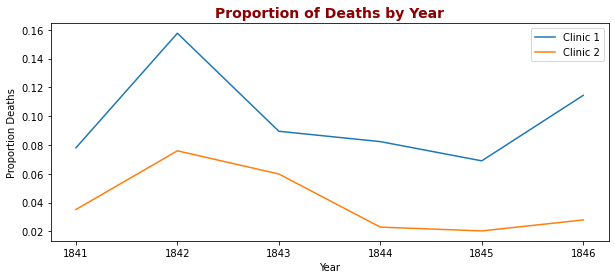

In [3]:
# This makes plots appear in the notebook
%matplotlib inline
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}

# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x='year', y='proportion_deaths', label='Clinic 1', figsize=(10, 4))
ax = clinic_2.plot(x='year', y='proportion_deaths', label='Clinic 2', ax=ax)
_ = ax.set_xlabel('Year')
_ = ax.set_ylabel('Proportion Deaths')
_ = ax.set_title('Proportion of Deaths by Year', **title_param)

# Task 4: The handwashing begins

**Instructions**

Load in the dataset with the monthly number of deaths for Clinic 1.

- Read in datasets/monthly_deaths.csv and assign it to the variable monthly. Make sure to tell read_csv to parse the date column as a date.
- Calculate the proportion of deaths per number of births and store the result in the new column monthly["proportion_deaths"].
- Print out the first rows in monthly using the .head() method.

__________________________________
The read_csv() function doesn't automatically detect which columns contain dates. You can tell read_csv() this by giving a list of the date columns as the optional argument parse_dates. For example, if datasets/my_data.csv is a csv-file with a date column date then you can read it in like this:
<code>
my_df = pd.read_csv(
    "datasets/my_data.csv", 
    parse_dates=["date"])
</code>
__________________________________

>Why is the proportion of deaths consistently so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.
>
>Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time.
>
>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect. 

In [4]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly.deaths / monthly.births

# Print out the first rows in monthly
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


# Task 5: The effect of handwashing

**Instructions**

Plot the monthly proportion of deaths for Clinic 1.

- Plot proportion_deaths by date for the monthly date using the DataFrame .plot() method.
- Change the y-axis label to "Proportion deaths"
- Save the Axes object returned by the .plot() method into the variable ax.

__________________________________
>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it! 

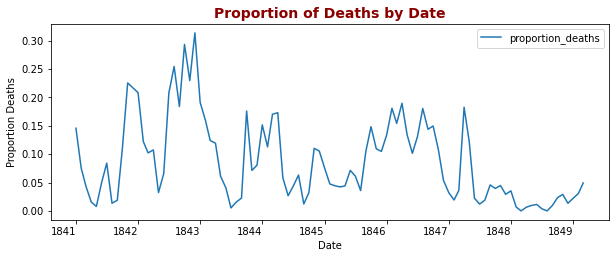

In [5]:
%matplotlib inline
# Plot monthly proportion of deaths
ax = monthly.plot(x='date', y='proportion_deaths', 
                  xlabel='Date', ylabel='Proportion Deaths', rot=0,
                  figsize=(10, 4))
_ = ax.set_title('Proportion of Deaths by Date', **title_param)

# Task 6: The effect of handwashing highlighted

**Instructions**

Make a plot that highlights the effect of handwashing. The code to define handwashing_start is already provided to you using pandas' to_datetime() function.

- Split monthly into before_washing (the rows in monthly before handwashing_start) and after_washing (the rows in monthly at and after handwashing_start).
- Using the same approach you used in Task 3, plot proportion_deaths in before_washing and after_washing into the same plot. - Again, use the DataFrame .plot() method twice, saving the Axes object returned by the first call of .plot() into the variable ax.
    - Label the plotted lines using the label argument to .plot().
    - Change the y-axis label to "Proportion deaths" in your second call of .plot().

__________________________________
Since the column monthly["date"] was read in as a date column we can now compare it to other dates using the comparison operators (<, >=, ==, etc.). For example, to pick out the row exactly at handwashing_start we could write:
<code>
at_washing = monthly[monthly["date"] == handwashing_start]
</code>

__________________________________

>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory.
>
>The effect of handwashing is made even more clear if we highlight this in the graph. 

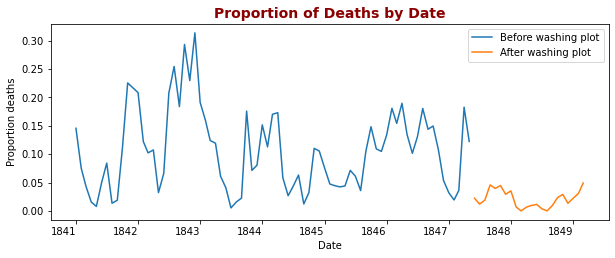

In [6]:
%matplotlib inline
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly.date <  handwashing_start]
after_washing  = monthly[monthly.date >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_deaths', 
                         label='Before washing plot', figsize=(10, 4))
ax =  after_washing.plot(x='date', y='proportion_deaths',
                         xlabel='Date', ylabel='Proportion deaths', rot=0,
                         label='After washing plot', ax=ax)
_ = ax.set_title('Proportion of Deaths by Date', **title_param)

# Task 7: More handwashing, fewer deaths?

**Instructions**

Calculate the average reduction in proportion of deaths due to handwashing.

- Select the column proportion_deaths in before_washing and assign it to before_proportion.
- Do the same for proportion_deaths in after_washing and assign it to after_proportion.
- Calculate the difference in mean monthly proportion of deaths as mean after_proportion minus mean before_proportion.

__________________________________

For info on how to calculate the mean of before_proportion and after_proportion take a look under the heading Summarize data in the <a href='https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf'>pandas cheat sheet</a>.
__________________________________

> Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?

In [7]:
import numpy as np

# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths

bp, ap = before_proportion.mean(), after_proportion.mean()
mean_diff = ap - bp

print("""
Death proportion before washing: {}
Death proportion after washing : {}

Difference: {}

Are they close? {}
""".format(bp, ap, mean_diff, np.isclose(bp, ap)))


Death proportion before washing: 0.10504998260908789
Death proportion after washing : 0.021093375097254535

Difference: -0.08395660751183336

Are they close? False



# Task 8: A Bootstrap analysis of Semmelweis handwashing data

**Instructions**

Make a bootstrap analysis of the difference in mean monthly proportion of deaths.

- Within your for loop:
    - boot_before and boot_after should be sampled with replacement from before_proportion and after_proportion.
    - The difference in means should be appended to boot_mean_diff.
- Calculate a 95% confidence_interval as the 2.5% and 97.5% quantiles of boot_mean_diff.

__________________________________

A bootstrap analysis is a quick way of getting at the uncertainty of an estimate, in your case the estimate is the mean_diff you calculated in Task 7. A bootstrap analysis works by simulating redoing the data collection by drawing randomly from the data and allowing a value to be drawn many times. Using a pandas column my_col (also called a Series), this can be done like this:
<code>
boot_col = my_col.sample(frac=1, replace=True)
</code>

The estimate is then calculated using boot_col instead of my_col. This process is repeated a large number of times and the distribution of the bootstrapped estimates represents the uncertainty around the original estimate. If boot_mean is a list of bootstrap estimates you can calculate a 95% confidence interval using pandas:
<code>
pd.Series(boot_mean).quantile([0.025, 0.975])
</code>

If you want to learn more about how the bootstrap works you should check out the course <a href='https://www.datacamp.com/courses/statistical-thinking-in-python-part-2'>Statistical Thinking in Python (Part 2)</a>!
__________________________________

>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards).
>
>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method). 

In [8]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = [after_washing.proportion_deaths.sample(frac=1, replace=True).mean() - \
                  before_washing.proportion_deaths.sample(frac=1, replace=True).mean() \
                  for i in range(3000)]

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100778
0.975   -0.067248
dtype: float64

# Task 9: The fate of Dr. Semmelweis

**Instructions**

- Given the data Semmelweis collected, is it True or False that doctors should wash their hands?

__________________________________
Congratulations, you've made it this far! If you haven't tried it already, you should check your project now by clicking the "Check project" button.

Good luck! :)
__________________________________

>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.
>
>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.
>
>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.

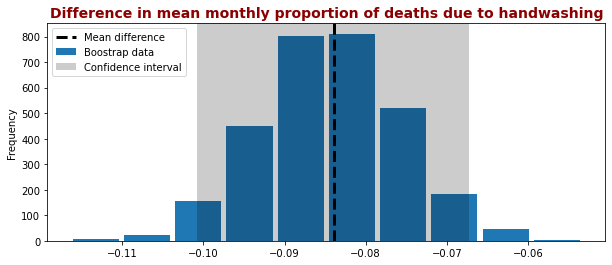

In [9]:
%matplotlib inline
# A bootstrap analysis of the reduction of deaths due to handwashing
ax = pd.Series(boot_mean_diff).plot.hist(xlabel='Proportion deaths reduction', ylabel='Distribution', 
                                         label='Boostrap data', rot=0, rwidth=0.9, figsize=(10, 4))
ax.axvspan(confidence_interval.values[0], confidence_interval.values[1],
           facecolor='k', alpha=0.2, label='Confidence interval')
ax.axvline(mean_diff, ls='--', lw=3, color='k', label='Mean difference')
ax.legend()
_ = ax.set_title('Difference in mean monthly proportion of deaths due to handwashing', **title_param)

# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True

<font color=darkgreen>Congratulations, you passed all project tasks!
Rate this project to finish...</font>

# Aditional material

- Datacamp course: 
    - https://learn.datacamp.com/projects/discovery-of-handwashing/guided/Python
    - https://projects.datacamp.com/projects/20